In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 자료 기본 구성 확인

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train.shape   #891행, 15열   

(891, 12)

In [5]:
# 데이터의 컬럼 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 변수에 따른 생존율 여러 방법으로 확인 해보기

In [7]:
survived_rate = train.Survived.mean() * 100
print('생존율 :',round(survived_rate,1),'%')

생존율 : 38.4 %


In [8]:
# 생존자 : 342명, 사망자 : 549명
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# 실습하기
# 성별에 따른 생존자의 수를 구해주세요
train.loc[train.Survived==1,:].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
# 실습하기
# 성별에 따른 사망자의 수를 구해주세요
train.loc[train.Survived==0, : ].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

## 데이터를 시각화하여 변수 확인

In [12]:
import seaborn as sns

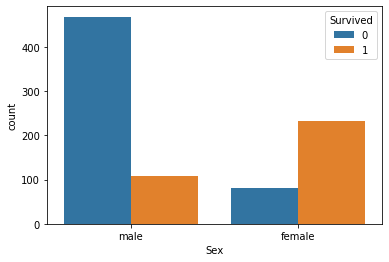

In [13]:
# 성별에 따른 생존. 차이가 두드러진 것을 볼 수 있음

sns.countplot(data=train,x='Sex', hue='Survived')

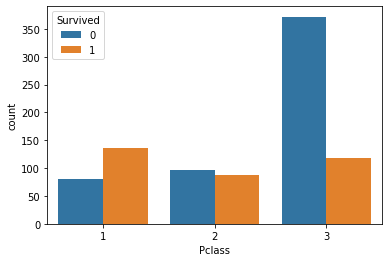

In [14]:
# Pclass에 따른 생존. 차이가 두드러진 것을 볼 수 있음
sns.countplot(x="Pclass", hue="Survived", data=train)

In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
train.loc[train.Survived==0, : ].Pclass.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [17]:
#3등급에서 죽은 비율
372/491

0.7576374745417516

In [18]:
#2등급에서 죽은 비율
97/184

0.5271739130434783

In [19]:
#1등급에서 죽은 비율
80/216

0.37037037037037035

In [20]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


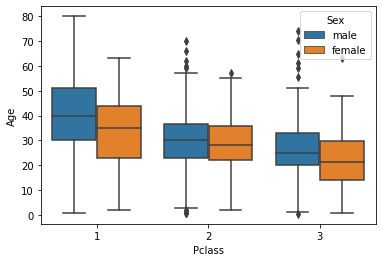

In [21]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

In [22]:

sns.lmplot(data=low_fare, x='Age', y='Pclass', hue='Survived')

NameError: name 'low_fare' is not defined

In [ ]:
low_fare = train.loc[train.Fare <100,:]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

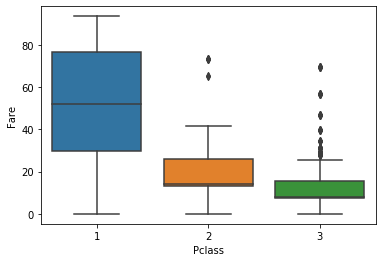

In [23]:
low_fare = train.loc[train.Fare <100,:]

sns.boxplot(x='Pclass', y='Fare', data=low_fare)

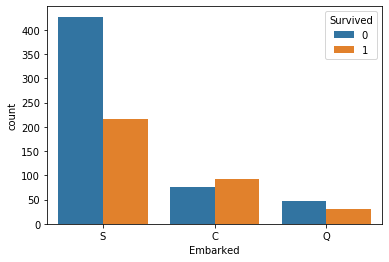

In [24]:
sns.countplot(data=train,x='Embarked',hue='Survived')
# 탑승 항구 별 생존

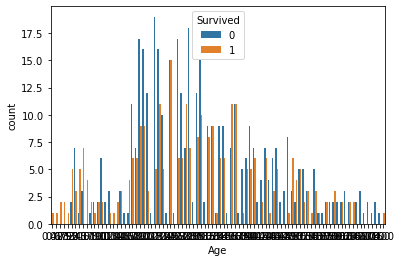

In [25]:
sns.countplot(data=train,x='Age', hue='Survived')

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## age, cabin, embarked 결측치 대체/ 삭제

In [28]:
#embarked 결측치 최다값 s로 대체

train['Embarked'].fillna('S', inplace=True)

In [29]:
test['Embarked'].fillna('S', inplace=True)

In [30]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
dtype: int64

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
dtype: int64

In [33]:
# 필요없는 컬럼 삭제
train = train.drop(['Cabin'],axis=1)

In [34]:
test = test.drop(['Cabin'],axis=1)

In [35]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64

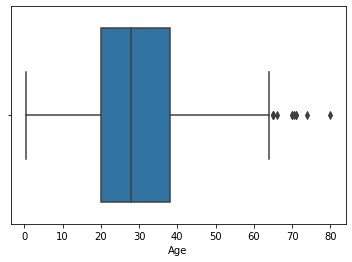

In [36]:
sns.boxplot(x='Age', hue='Survived', data=train)

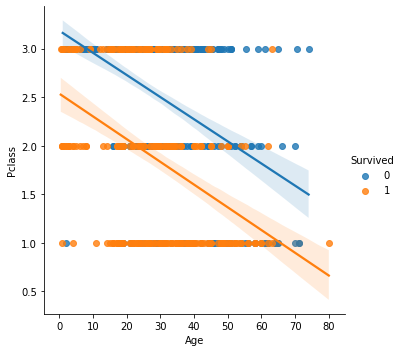

In [37]:

sns.lmplot(data=train, x='Age', y='Pclass', hue='Survived')

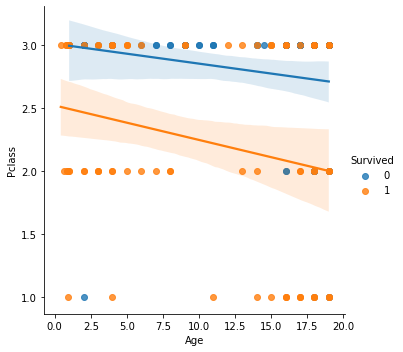

In [38]:
low_age = train.loc[train.Age <20,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

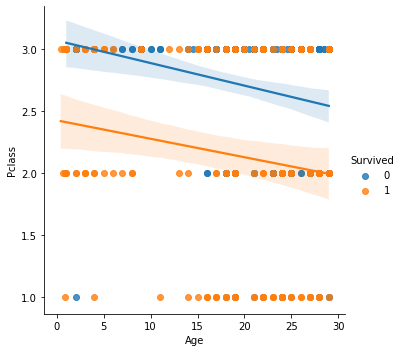

In [39]:
low_age = train.loc[train.Age <30,:]
sns.lmplot(data=low_age, x='Age', y='Pclass', hue='Survived')

In [40]:
train.loc[train['Pclass']==1,'Age'].mean()

38.233440860215055

In [41]:
train.loc[train['Pclass']==2,'Age'].mean()

29.87763005780347

In [42]:
train.loc[train['Pclass']==3,'Age'].mean()

25.14061971830986

In [43]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
Pclass,,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.393519,0.597222,0.009259
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.092391,0.891304,0.016304
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.134420,0.718941,0.146640


In [44]:
test.groupby('Pclass').mean()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
Pclass,,,,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297,0.523364,0.467290,0.009346
2,1117.935484,28.777500,0.376344,0.344086,22.202104,0.118280,0.838710,0.043011
3,1094.178899,24.027945,0.463303,0.417431,12.459678,0.160550,0.651376,0.188073


In [45]:
#Pclass 별로 age 평균값 대체


fill_mean_func= lambda g: g.fillna(g.mean())
train = train.groupby('Pclass').apply(fill_mean_func)    

In [46]:

fill_mean_func= lambda g: g.fillna(g.mean())
test = test.groupby('Pclass').apply(fill_mean_func)   

In [47]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
dtype: int64

In [48]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
dtype: int64

In [49]:
#age를 어린이, 10대, 20대, ... ,60대 이상 노인으로 분류

train['Age_cut']=0

In [50]:
test['Age_cut']=0

In [51]:
train['Age_cut']=pd.cut(train.Age, bins=[0,10,20,30,40,50,60,200],labels=[0,1,2,3,4,5,6])

In [52]:
test['Age_cut']=pd.cut(test.Age, bins=[0,10,20,30,40,50,60,200],labels=[0,1,2,3,4,5,6])

In [53]:
train.Age_cut.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_cut
2,377
3,185
1,115
4,86
0,64
5,42
6,22


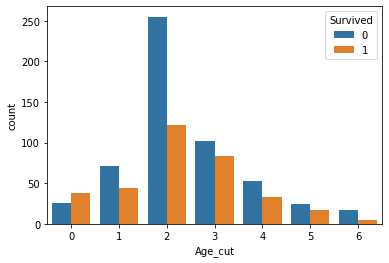

In [54]:
sns.countplot(data=train,x='Age_cut', hue='Survived')

In [55]:
train['family_size'] = train.SibSp + train.Parch
# family_size에 동반한 가족의 유무를 넣는다

In [56]:
test['family_size'] = test.SibSp + test.Parch

In [57]:
train['is_solo'] = train.family_size.apply(lambda x : 1 if x == 0 else 0)
# 동반한 가족이 없으면 is_solo에 1을 넣음di

In [58]:
test['is_solo'] = test.family_size.apply(lambda x : 1 if x == 0 else 0)

In [59]:
train.head()

PassengerId  Survived  Pclass  \
Pclass                                     
1      1             2         1       1   
       3             4         1       1   
       6             7         0       1   
       11           12         1       1   
       23           24         1       1   

                                                        Name     Sex   Age  \
Pclass                                                                       
1      1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
       3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
       6                             McCarthy, Mr. Timothy J    male  54.0   
       11                           Bonnell, Miss. Elizabeth  female  58.0   
       23                       Sloper, Mr. William Thompson    male  28.0   

           SibSp  Parch    Ticket     Fare Embarked  Embarked_C  Embarked_S  \
Pclass                                                                        
1      1       1      0  PC 17599  71.2833        C        True       False   
       3       1      0    113803  53.1000        S       False        True   
       6       0      0     17463  51.8625        S       False        True   
       11      0      0    113783  26.5500        S       False        True   
       23      0      0    113788  35.5000        S       False        True   

           Embarked_Q Age_cut  family_size  is_solo  
Pclass                                               
1      1        False       3            1        0  
       3        False       3            1        0  
       6        False       5            0        1  
       11       False       5            0        1  
       23       False       2            0        1

In [60]:
test.head()

PassengerId  Pclass  \
Pclass                           
1      11          903       1   
       12          904       1   
       14          906       1   
       20          912       1   
       22          914       1   

                                                        Name     Sex  \
Pclass                                                                 
1      11                         Jones, Mr. Charles Cresson    male   
       12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female   
       14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female   
       20                             Rothschild, Mr. Martin    male   
       22               Flegenheim, Mrs. Alfred (Antoinette)  female   

                 Age  SibSp  Parch       Ticket     Fare Embarked  Embarked_C  \
Pclass                                                                          
1      11  46.000000      0      0          694  26.0000        S       False   
       12  23.000000      1      0        21228  82.2667        S       False   
       14  47.000000      1      0  W.E.P. 5734  61.1750        S       False   
       20  55.000000      1      0     PC 17603  59.4000        C        True   
       22  40.918367      0      0     PC 17598  31.6833        S       False   

           Embarked_S  Embarked_Q Age_cut  family_size  is_solo  
Pclass                                                           
1      11        True       False       4            0        1  
       12        True       False       2            1        0  
       14        True       False       4            1        0  
       20       False       False       5            1        0  
       22        True       False       4            0        1

In [61]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Age_cut        0
family_size    0
is_solo        0
dtype: int64

In [62]:
train.tail()

PassengerId  Survived  Pclass  \
Pclass                                      
3      882          883         0       3   
       884          885         0       3   
       885          886         0       3   
       888          889         0       3   
       890          891         0       3   

                                                Name     Sex       Age  SibSp  \
Pclass                                                                          
3      882              Dahlberg, Miss. Gerda Ulrika  female  22.00000      0   
       884                    Sutehall, Mr. Henry Jr    male  25.00000      0   
       885      Rice, Mrs. William (Margaret Norton)  female  39.00000      0   
       888  Johnston, Miss. Catherine Helen "Carrie"  female  25.14062      1   
       890                       Dooley, Mr. Patrick    male  32.00000      0   

            Parch           Ticket     Fare Embarked  Embarked_C  Embarked_S  \
Pclass                                                                         
3      882      0             7552  10.5167        S       False        True   
       884      0  SOTON/OQ 392076   7.0500        S       False        True   
       885      5           382652  29.1250        Q       False       False   
       888      2       W./C. 6607  23.4500        S       False        True   
       890      0           370376   7.7500        Q       False       False   

            Embarked_Q Age_cut  family_size  is_solo  
Pclass                                                
3      882       False       2            0        1  
       884       False       2            0        1  
       885        True       3            5        0  
       888       False       2            3        0  
       890        True       3            0        1

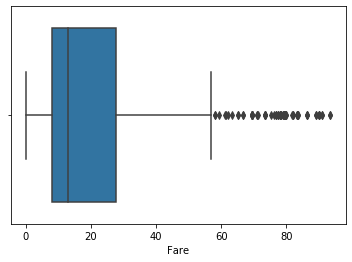

In [63]:
#fare를 그룹화하기 위해 여러 방법으로 확인

low_fare = train.loc[train.Fare <100]

sns.boxplot(x='Fare', hue='Survived', data=low_fare)

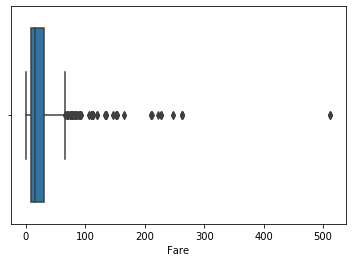

In [64]:
sns.boxplot(x='Fare', hue='Survived', data=train)

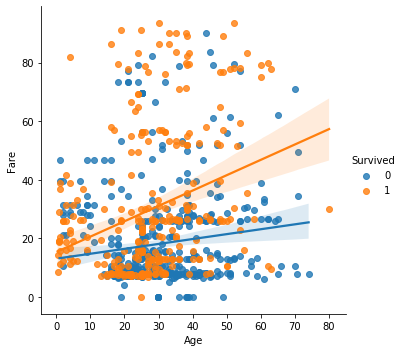

In [65]:
low_fare = train.loc[train.Fare <100,:]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

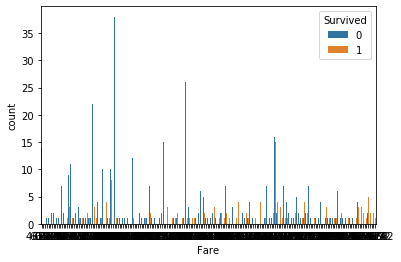

In [66]:
low_fare = train.loc[train.Fare < 60]
sns.countplot(data=low_fare,x='Fare', hue='Survived')

In [67]:
train['Fare_cut']=0

In [68]:
train['Fare_cut']=pd.cut(train.Fare, bins=[-1,15,30,60,200000],labels=[1,2,3,4])

In [69]:
test['Fare_cut']=0
test['Fare_cut']=pd.cut(test.Fare, bins=[-1,15,30,60,200000],labels=[1,2,3,4])

In [70]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Age_cut        0
family_size    0
is_solo        0
Fare_cut       0
dtype: int64

In [71]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Age_cut        0
family_size    0
is_solo        0
Fare_cut       0
dtype: int64

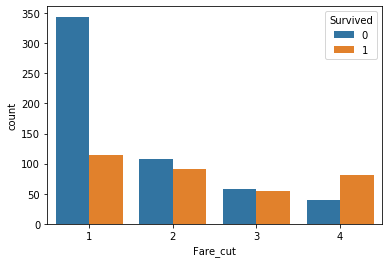

In [72]:
sns.countplot(data=train,x='Fare_cut', hue='Survived')

#1S에서 사망률 굉장히 높고 4s에서는 생존율이 높음

In [73]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,family_size,is_solo
PassengerId,1.000000,-0.005007,-0.035144,0.035256,-0.057527,-0.001652,0.012658,-0.001205,0.022204,-0.033606,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.050504,-0.035322,0.081629,0.257307,0.168240,-0.149683,0.003650,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.403858,0.083081,0.018443,-0.549500,-0.243292,0.074053,0.221009,0.065997,0.135207
Age,0.035256,-0.050504,-0.403858,1.000000,-0.243452,-0.175799,0.120886,0.042064,0.007400,-0.070315,-0.254217,0.170877
SibSp,-0.057527,-0.035322,0.083081,-0.243452,1.000000,0.414838,0.159651,-0.059528,0.068734,-0.026354,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.175799,0.414838,1.000000,0.216225,-0.011069,0.060814,-0.081228,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.120886,0.159651,0.216225,1.000000,0.269335,-0.162184,-0.117216,0.217138,-0.271832
Embarked_C,-0.001205,0.168240,-0.243292,0.042064,-0.059528,-0.011069,0.269335,1.000000,-0.782742,-0.148258,-0.046215,-0.095298
Embarked_S,0.022204,-0.149683,0.074053,0.007400,0.068734,0.060814,-0.162184,-0.782742,1.000000,-0.499421,0.077359,0.029074
Embarked_Q,-0.033606,0.003650,0.221009,-0.070315,-0.026354,-0.081228,-0.117216,-0.148258,-0.499421,1.000000,-0.058592,0.086464


In [74]:
train.tail()

PassengerId  Survived  Pclass  \
Pclass                                      
3      882          883         0       3   
       884          885         0       3   
       885          886         0       3   
       888          889         0       3   
       890          891         0       3   

                                                Name     Sex       Age  SibSp  \
Pclass                                                                          
3      882              Dahlberg, Miss. Gerda Ulrika  female  22.00000      0   
       884                    Sutehall, Mr. Henry Jr    male  25.00000      0   
       885      Rice, Mrs. William (Margaret Norton)  female  39.00000      0   
       888  Johnston, Miss. Catherine Helen "Carrie"  female  25.14062      1   
       890                       Dooley, Mr. Patrick    male  32.00000      0   

            Parch           Ticket     Fare Embarked  Embarked_C  Embarked_S  \
Pclass                                                                         
3      882      0             7552  10.5167        S       False        True   
       884      0  SOTON/OQ 392076   7.0500        S       False        True   
       885      5           382652  29.1250        Q       False       False   
       888      2       W./C. 6607  23.4500        S       False        True   
       890      0           370376   7.7500        Q       False       False   

            Embarked_Q Age_cut  family_size  is_solo Fare_cut  
Pclass                                                         
3      882       False       2            0        1        1  
       884       False       2            0        1        1  
       885        True       3            5        0        2  
       888       False       2            3        0        2  
       890        True       3            0        1        1

In [75]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_S     0
Embarked_Q     0
Age_cut        0
family_size    0
is_solo        0
Fare_cut       0
dtype: int64

In [76]:
# 성별을 머신러닝에서 연산이 가능하도록 수치성으로 변경하기
# 람다연산 조건문 : lambda x: 참일때 if조건 else 거짓일때
train.Sex = train.Sex.apply(lambda x: 0 if x == 'male' else 1)
# 남성은 0, 여성은 1

In [77]:
test.Sex = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [78]:
train.head()

PassengerId  Survived  Pclass  \
Pclass                                     
1      1             2         1       1   
       3             4         1       1   
       6             7         0       1   
       11           12         1       1   
       23           24         1       1   

                                                        Name  Sex   Age  \
Pclass                                                                    
1      1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
       3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
       6                             McCarthy, Mr. Timothy J    0  54.0   
       11                           Bonnell, Miss. Elizabeth    1  58.0   
       23                       Sloper, Mr. William Thompson    0  28.0   

           SibSp  Parch    Ticket     Fare Embarked  Embarked_C  Embarked_S  \
Pclass                                                                        
1      1       1      0  PC 17599  71.2833        C        True       False   
       3       1      0    113803  53.1000        S       False        True   
       6       0      0     17463  51.8625        S       False        True   
       11      0      0    113783  26.5500        S       False        True   
       23      0      0    113788  35.5000        S       False        True   

           Embarked_Q Age_cut  family_size  is_solo Fare_cut  
Pclass                                                        
1      1        False       3            1        0        4  
       3        False       3            1        0        3  
       6        False       5            0        1        3  
       11       False       5            0        1        2  
       23       False       2            0        1        3

In [79]:
test.head()

PassengerId  Pclass  \
Pclass                           
1      11          903       1   
       12          904       1   
       14          906       1   
       20          912       1   
       22          914       1   

                                                        Name  Sex        Age  \
Pclass                                                                         
1      11                         Jones, Mr. Charles Cresson    0  46.000000   
       12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)    1  23.000000   
       14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...    1  47.000000   
       20                             Rothschild, Mr. Martin    0  55.000000   
       22               Flegenheim, Mrs. Alfred (Antoinette)    1  40.918367   

           SibSp  Parch       Ticket     Fare Embarked  Embarked_C  \
Pclass                                                               
1      11      0      0          694  26.0000        S       False   
       12      1      0        21228  82.2667        S       False   
       14      1      0  W.E.P. 5734  61.1750        S       False   
       20      1      0     PC 17603  59.4000        C        True   
       22      0      0     PC 17598  31.6833        S       False   

           Embarked_S  Embarked_Q Age_cut  family_size  is_solo Fare_cut  
Pclass                                                                    
1      11        True       False       4            0        1        2  
       12        True       False       2            1        0        4  
       14        True       False       4            1        0        4  
       20       False       False       5            1        0        3  
       22        True       False       4            0        1        3

In [80]:
train.corr()   #Sex와 다른 변수 간의 연관성 확인. survived와 연관성 높음.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,family_size,is_solo
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035256,-0.057527,-0.001652,0.012658,-0.001205,0.022204,-0.033606,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.050504,-0.035322,0.081629,0.257307,0.168240,-0.149683,0.003650,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.403858,0.083081,0.018443,-0.549500,-0.243292,0.074053,0.221009,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080464,0.114631,0.245489,0.182333,0.082853,-0.119224,0.074115,0.200988,-0.303646
Age,0.035256,-0.050504,-0.403858,-0.080464,1.000000,-0.243452,-0.175799,0.120886,0.042064,0.007400,-0.070315,-0.254217,0.170877
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243452,1.000000,0.414838,0.159651,-0.059528,0.068734,-0.026354,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,0.245489,-0.175799,0.414838,1.000000,0.216225,-0.011069,0.060814,-0.081228,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.182333,0.120886,0.159651,0.216225,1.000000,0.269335,-0.162184,-0.117216,0.217138,-0.271832
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,0.042064,-0.059528,-0.011069,0.269335,1.000000,-0.782742,-0.148258,-0.046215,-0.095298
Embarked_S,0.022204,-0.149683,0.074053,-0.119224,0.007400,0.068734,0.060814,-0.162184,-0.782742,1.000000,-0.499421,0.077359,0.029074


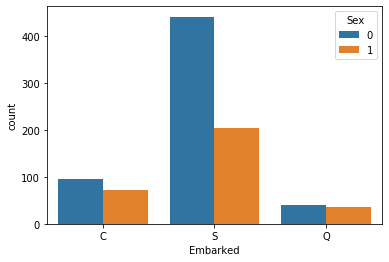

In [81]:
sns.countplot(data=train,x='Embarked',hue='Sex')

In [82]:
train.head()

PassengerId  Survived  Pclass  \
Pclass                                     
1      1             2         1       1   
       3             4         1       1   
       6             7         0       1   
       11           12         1       1   
       23           24         1       1   

                                                        Name  Sex   Age  \
Pclass                                                                    
1      1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
       3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
       6                             McCarthy, Mr. Timothy J    0  54.0   
       11                           Bonnell, Miss. Elizabeth    1  58.0   
       23                       Sloper, Mr. William Thompson    0  28.0   

           SibSp  Parch    Ticket     Fare Embarked  Embarked_C  Embarked_S  \
Pclass                                                                        
1      1       1      0  PC 17599  71.2833        C        True       False   
       3       1      0    113803  53.1000        S       False        True   
       6       0      0     17463  51.8625        S       False        True   
       11      0      0    113783  26.5500        S       False        True   
       23      0      0    113788  35.5000        S       False        True   

           Embarked_Q Age_cut  family_size  is_solo Fare_cut  
Pclass                                                        
1      1        False       3            1        0        4  
       3        False       3            1        0        3  
       6        False       5            0        1        3  
       11       False       5            0        1        2  
       23       False       2            0        1        3

In [83]:
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [84]:
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [85]:
train.head()

PassengerId  Survived  Pclass  \
Pclass                                     
1      1             2         1       1   
       3             4         1       1   
       6             7         0       1   
       11           12         1       1   
       23           24         1       1   

                                                        Name  Sex   Age  \
Pclass                                                                    
1      1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
       3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
       6                             McCarthy, Mr. Timothy J    0  54.0   
       11                           Bonnell, Miss. Elizabeth    1  58.0   
       23                       Sloper, Mr. William Thompson    0  28.0   

           SibSp  Parch    Ticket     Fare  Embarked  Embarked_C  Embarked_S  \
Pclass                                                                         
1      1       1      0  PC 17599  71.2833         1        True       False   
       3       1      0    113803  53.1000         0       False        True   
       6       0      0     17463  51.8625         0       False        True   
       11      0      0    113783  26.5500         0       False        True   
       23      0      0    113788  35.5000         0       False        True   

           Embarked_Q Age_cut  family_size  is_solo Fare_cut  
Pclass                                                        
1      1        False       3            1        0        4  
       3        False       3            1        0        3  
       6        False       5            0        1        3  
       11       False       5            0        1        2  
       23       False       2            0        1        3

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (1, 1) to (3, 890)
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    int64   
 11  Embarked_C   891 non-null    bool    
 12  Embarked_S   891 non-null    bool    
 13  Embarked_Q   891 non-null    bool    
 14  Age_cut      891 non-null    category
 15  family_size  891 non-null    int64   
 16  is_solo      891 non-null    int64   
 17  Fare_cut     891 non-null    category
dtypes: bool(3), category

In [87]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_S,Embarked_Q,family_size,is_solo
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035256,-0.057527,-0.001652,0.012658,-0.030467,-0.001205,0.022204,-0.033606,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.050504,-0.035322,0.081629,0.257307,0.106811,0.168240,-0.149683,0.003650,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.403858,0.083081,0.018443,-0.549500,0.045702,-0.243292,0.074053,0.221009,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080464,0.114631,0.245489,0.182333,0.116569,0.082853,-0.119224,0.074115,0.200988,-0.303646
Age,0.035256,-0.050504,-0.403858,-0.080464,1.000000,-0.243452,-0.175799,0.120886,-0.036299,0.042064,0.007400,-0.070315,-0.254217,0.170877
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243452,1.000000,0.414838,0.159651,-0.059961,-0.059528,0.068734,-0.026354,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,0.245489,-0.175799,0.414838,1.000000,0.216225,-0.078665,-0.011069,0.060814,-0.081228,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.182333,0.120886,0.159651,0.216225,1.000000,0.062142,0.269335,-0.162184,-0.117216,0.217138,-0.271832
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.036299,-0.059961,-0.078665,0.062142,1.000000,0.484540,-0.923679,0.793265,-0.080281,0.017807
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,0.042064,-0.059528,-0.011069,0.269335,0.484540,1.000000,-0.782742,-0.148258,-0.046215,-0.095298


# Step6. 모델 설계 및 학습
- 모델(머신러닝)에서 사용할 컬럼(feature)를 선정하기

In [88]:
feature_names = ['Sex','Pclass','Fare_cut','Age_cut','is_solo','family_size',"Embarked_S","Embarked_C","Embarked_Q"]

In [89]:
# 특성을 이용하여 머신러닝의 모델을 만들 데이터를 만들기

x_train = train[feature_names]
x_train.head()

Sex  Pclass Fare_cut Age_cut  is_solo  family_size  Embarked_S  \
Pclass                                                                      
1      1     1       1        4       3        0            1       False   
       3     1       1        3       3        0            1        True   
       6     0       1        3       5        1            0        True   
       11    1       1        2       5        1            0        True   
       23    0       1        3       2        1            0        True   

           Embarked_C  Embarked_Q  
Pclass                             
1      1         True       False  
       3        False       False  
       6        False       False  
       11       False       False  
       23       False       False

In [90]:
x_test = test[feature_names]
x_test.head()

Sex  Pclass Fare_cut Age_cut  is_solo  family_size  Embarked_S  \
Pclass                                                                      
1      11    0       1        2       4        1            0        True   
       12    1       1        4       2        0            1        True   
       14    1       1        4       4        0            1        True   
       20    0       1        3       5        0            1       False   
       22    1       1        3       4        1            0        True   

           Embarked_C  Embarked_Q  
Pclass                             
1      11       False       False  
       12       False       False  
       14       False       False  
       20        True       False  
       22       False       False

In [91]:
# y값(정답) 만들기
label_name = 'Survived'
y_train = train[label_name]
y_train

Pclass     
1       1      1
        3      1
        6      0
        11     1
        23     1
              ..
3       882    0
        884    0
        885    0
        888    0
        890    0
Name: Survived, Length: 891, dtype: int64

# 데이터 검사

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [93]:
# 모델 만들기
model = RandomForestClassifier(n_estimators = 100)     # 15번 학습시키겠다
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
# 모델을 학습시키기
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
# 예측하기
pridections = model.predict(x_test)
pridections.shape

(418,)

In [96]:
# 정확도 측정
score = cross_val_score(model, x_train, y_train, cv=20, scoring='accuracy')

In [97]:
round(np.mean(score) * 100, 2)

77.88

In [98]:
# 제출용 데이터 만들기
submit = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [99]:
submit.Survived = pridections
submit.head()

,Survived
PassengerId,
892,0
893,1
894,1
895,1
896,1


In [100]:
submit.to_csv("C:\\Users\\id272\\LSJ\\noeul\\result2.csv")

## Decision Tree


In [101]:
# 특성을 이용하여 머신러닝의 모델을 만들 데이터를 만들기

x_train = train[feature_names]
x_train.head()

Sex  Pclass Fare_cut Age_cut  is_solo  family_size  Embarked_S  \
Pclass                                                                      
1      1     1       1        4       3        0            1       False   
       3     1       1        3       3        0            1        True   
       6     0       1        3       5        1            0        True   
       11    1       1        2       5        1            0        True   
       23    0       1        3       2        1            0        True   

           Embarked_C  Embarked_Q  
Pclass                             
1      1         True       False  
       3        False       False  
       6        False       False  
       11       False       False  
       23       False       False

In [102]:
x_test = test[feature_names]
x_test.head()

Sex  Pclass Fare_cut Age_cut  is_solo  family_size  Embarked_S  \
Pclass                                                                      
1      11    0       1        2       4        1            0        True   
       12    1       1        4       2        0            1        True   
       14    1       1        4       4        0            1        True   
       20    0       1        3       5        0            1       False   
       22    1       1        3       4        1            0        True   

           Embarked_C  Embarked_Q  
Pclass                             
1      11       False       False  
       12       False       False  
       14       False       False  
       20        True       False  
       22       False       False

In [103]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


Pclass    
1       1     1
        3     1
        6     0
        11    1
        23    1
Name: Survived, dtype: int64

In [104]:
# scikit-learn == sklearn
from sklearn.tree  import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 20)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
# 1)fit 머신러닝 알고리즘을 학습 시키는 것 데이터 사이의 패턴을 머신러닝 알고리즘이 스스로 판단
# fit 할때는 train 데이터 predict 할때는 test 데이터
# 2) predict
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
prediction = model.predict(x_test)

print(prediction.shape)
prediction[0:5]

(418,)


array([0, 1, 1, 0, 1], dtype=int64)

In [107]:
submit= pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)

submit["Survived"] = prediction

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,1
895,0
896,1


In [108]:
#저장
submit.to_csv("C:\\Users\\id272\\LSJ\\noeul\\result2_decision_tree2.csv")